# Question 1

CDF of frechet distribution is given by:

\begin{equation}
    P(X\leq x) = \begin{cases}
    e^{-\frac{x}{s}^{-a}} & x>0\\
    0 & x\leq 0
    \end{cases}
\end{equation}

Therefore, the Frechet distribution is given by

\begin{equation}
    p(x)=\begin{cases}
    \frac{a}{s}(\frac{x}{s})^{-(1+a)}e^{-\frac{x}{a}^{-a}} & x>0\\
    0 & x\leq 0
    \end{cases}
\end{equation}

200
1
1


AttributeError: module 'matplotlib.pyplot' has no attribute 'x_limit'

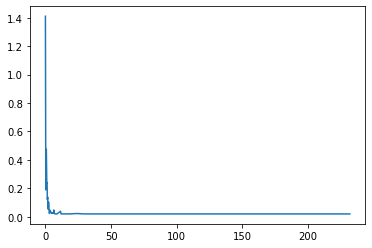

In [ ]:
import numpy,seaborn
from math import log
from matplotlib import pyplot
from scipy.stats import norm
n,a,s=int(input()),float(input()),float(input())
assert a>0
arr=numpy.random.uniform(low=-0.5,high=1,size=n)
def frechet_cdf_inverse(x,a,s):
    return s*(-log(x))**(-1/a) if x>0 else 0
def frechet(x,a,s):
    return (a/s) * ((x/s)**(-1-a)) * numpy.exp(- (x/s)**(-a) ) if x>0 else 0
frech,frechet1=numpy.vectorize(frechet_cdf_inverse),numpy.vectorize(frechet)
ans=sorted(numpy.array([frechet_cdf_inverse(entry,a,s) for entry in arr]))
x=numpy.linspace(0,4,10**5)
y=frechet1(x,a,s)
def kde(x,x_list):
    return sum([norm.pdf(x,en,0.1) for en in x_list])/len(x_list)
an=numpy.array([kde(x,ans) for x in ans])
pyplot.plot(ans,an)
pyplot.x_limit(-1,10)
pyplot.show()

# Question 2

In [ ]:
from math import log
from scipy.stats import norm,expon
import numpy

def cross_entropy(x,P,Q):
    return numpy.array(sum([-P(y)*log(Q(y)) for y in x]))

def mutual_information(joint,marg_x,marg_y,X,Y):
    return sum([sum([joint(x,y)*log(joint(x,y)/marg_x(x)*marg_y(y)) for x in X]) for y in Y])

def conditional_entropy(joint,marg_x,X,Y):
    return sum([sum([joint(x,y)*log(joint(x,y)/marg_x(x)) for x in X]) for y in Y])

def kl_divergence(x,P,Q):
    return cross_entropy(x,P,Q)-cross_entropy(x,P,P)

155.57467622491652


# Question 6

we will take function 
\begin{equation}
  X \sim 0.7\mathcal{N}(-3,1)+0.3\mathcal{N}(3,1)
\end{equation}

Let the most optimum normal function be $\mathcal{N}(\mu,\sigma^{2})$ \\

Therefore, the forward KL divergence is given by:

\begin{equation}
  KL(P||Q)=E_{p}[log\frac{p}{q}]
\end{equation}

\begin{equation}
  \arg \min_{\mu,\sigma}KL(P||Q)= \arg \min_{\mu,\sigma}E_{p}[log\frac{p}{q}]
\end{equation}

Using Monte Carlo estimate:

\begin{equation}
  \arg \min_{\mu,\sigma}KL(P||Q)= \arg\min_{\mu,\sigma}\frac{1}{N}\sum_{i=1}^{N}log\frac{p(x_{i})}{q(x_{i})}
\end{equation}

\begin{equation}
  =\arg\min_{\mu,\sigma}-\frac{1}{N}\sum_{i=1}^{N}log(q(x_{i}))
\end{equation}

Where $x_{i}$ are samples drawn from $P$

Similarly,:

\begin{equation}
  \arg\min_{\mu,\sigma}=\frac{-1}{N}\sum_{i=1}^{N}
\end{equation}

30
[5. 2.]
[4.873462 2.339001]
[4.7857666 2.5167272]
[4.706353  2.6710963]
[4.639028  2.7826765]
[4.5782704 2.875232 ]
[4.520532  2.9583874]
[4.467072  3.0311882]
[4.417452  3.0926461]
[4.369662  3.1488311]
[4.325647 3.19504 ]
[4.284129  3.2353635]
[4.2436934 3.2744727]
[4.204146 3.311803]
[4.166918  3.3424535]
[4.128516 3.377959]
[4.0914726 3.4089475]
[4.0549374 3.4386172]
[4.0203166 3.4645   ]
[3.985057 3.491926]
[3.9515605 3.5155058]
[3.9190671 3.5362315]
[3.8870127 3.5567417]
[3.8552568 3.575956 ]
[3.824242  3.5937762]
[3.795023  3.6084323]
[3.765478  3.6241012]
[3.7349937 3.6416283]
[3.7057757 3.656787 ]
[3.6769712 3.6713347]


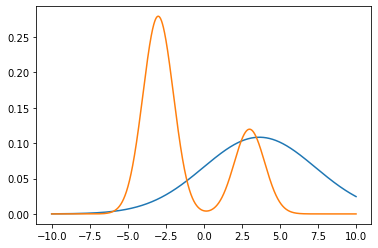

In [47]:
from scipy.stats import norm
import numpy
from matplotlib import pyplot
from math import log
import jax.numpy as jnp
from jax import grad
from jax.scipy.stats import norm as normal

def metropolis_hastings_sampling(pdf,n):
  i=0
  arr=jnp.zeros(n)
  arr=arr.at[0].set(1)
  for i in range(1,n,1):
    sample=numpy.random.normal(loc=arr[i-1],scale=3,size=None)
    a=numpy.random.uniform(low=0,high=1,size=None)
    arr=arr.at[i].set(sample*(a<pdf(sample)/pdf(arr[i-1]))+arr[i]*(a>pdf(sample)/pdf(arr[i-1])))
  return jnp.array(arr,float)

def func(x):
  return jnp.array(0.7*normal.pdf(x,loc=-3,scale=1)+0.3*normal.pdf(x,loc=3,scale=1),float)

def kl_divergence(var):
  mean=var[0]
  sd=var[1]
  n=1000
  samples=metropolis_hastings_sampling(func,n)
  logarithm=jnp.vectorize(log)
  function=jnp.vectorize((func))
  #print(logarithm(function(samples)/normal.pdf(samples,loc=mean,scale=sd)))
  arr=jnp.sum(jnp.array([-normal.logpdf(sample,loc=mean,scale=sd) for sample in samples],float))/1000
  return arr
  #return jnp.array(jnp.sum(logarithm(function(samples)/normal.pdf(samples,loc=mean,scale=sd))),float)

learning_rate=0.1
mu,sigma,iter=5.,2.,int(input())
grad_kl=grad(kl_divergence)
init=numpy.array([mu,sigma])

for i in range(iter):
  print(init)
  init-=learning_rate*grad_kl(init)

x=numpy.linspace(-10,10,10000)
y=norm.pdf(x,init[0],init[1])
y_prime=func(x)
pyplot.plot(x,y)
pyplot.plot(x,y_prime)
pyplot.show()

# Question 7

Let $\theta$ denote the probability of heads occuring by the coin\

Therefore, the pdf of $p$ is given by:

\begin{equation}
    p(\theta)=ab\theta^{a-1}(1-\theta^{a})^{b-1}
\end{equation}

\begin{equation}
    p(\theta)=6\theta(1-\theta^{2})^{2}
\end{equation}

After our experiment which yeilds 8 heads and 2 tails, let the posterior distribution have pdf denoted by $p(\theta|x)$. Therefore, Baye's theorem gives us:

\begin{equation}
    p(\theta|x)p(x)=p(x|\theta)p(\theta)
\end{equation}

Therefore,

\begin{equation}
    p(\theta|x)p(x)=\theta^{8}(1-\theta)^{2}6\theta(1-\theta^{2})^{2}
\end{equation}

\begin{equation}
    p(\theta|x)p(x)=6\theta^{9}(1-\theta)^{4}(1+\theta)^{2}
\end{equation}

$p(x)$ is given by:

\begin{equation}
    p(x)=\int_{0}^{1}p(x|\theta)p(\theta)d\theta
\end{equation}

\begin{equation}
    p(x)=6\int_{0}^{1}\theta^{9}(1-\theta)^{4}(1+\theta)^{2}d\theta
\end{equation}

\begin{equation}
    p(x)=6\int_{0}^{1}(\theta^{15}-2\theta^{14}-\theta^{13}+12\theta^{12}-\theta^{11}-2\theta^{10}+\theta^{9})dx
\end{equation}

\begin{equation}
    p(x)=6(\frac{1}{16}-\frac{2}{15}-\frac{1}{14}+\frac{4}{13}-\frac{1}{12}-\frac{2}{11}+\frac{1}{10})
\end{equation}

\begin{equation}
    p(x)=\frac{67}{40040}
\end{equation}

Therefore,

\begin{equation}
    p(\theta|x)=\frac{240240}{67}\theta^{9}(1-\theta)^{4}(1+\theta)^{2}
\end{equation}

In [ ]:
from fractions import Fraction
a=Fraction(1,16)-Fraction(2,15)-Fraction(1,14)+Fraction(4,13)-Fraction(1,12)-Fraction(2,11)+Fraction(1,10)
print(6*a)

67/40040


In [ ]:
!python -m pip install --upgrade --user pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
!python -m pip install --upgrade --user tensorflow tensorflow_probability

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0.0
